# TP 1. Introduction et premier problème de classification



Dans ce TP, on décrit les principaux problèmes de base en data science, et des éléments de méthodologie à adopter face aux problèmes "simples" de data science. On s'intéresse ensuite à un problème de classification : on veut prédire la note d'un vin en fonction de ses caractéristiques biochimiques. Le notebook suit plus ou moins librement l'énoncé du TD 1 du cours disponible ici : http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_enonce_cl_reg_anomaly.html#td2aenonceclreganomalyrst



## 1. Quelques bases de Machine Learning

*Disclaimer : ces rappels ne sont que des rappels pour faciliter le travail en TD et n'ont pas la prétention de se comparer à un vrai cours. Les notations mathématiques, par exemple, sont légèrement allégées pour mettre l'accent sur la partie vraiment "data science" pratique, qui est l'objet du cours. Des cours plus théoriques seront dispensés au second semestre de deuxième année et en troisième année, et l'objectif de ce cours est plutôt d'acquérir des bases algorithmiques et pratiques qui vous premettrons, en gros, de savoir faire un projet de data classique, un Kaggle, etc...* 

### 1.1 Apprentissage supervisé/non supervisé

En Machine Learning, on distingue principalement deux problèmes, selon les données que l'on possède :
 - le problème d'apprentissage **supervisé** : en apprentissage supervisé, on dispose d'un échantillon d'entraînement composé de $n$ couples $Z_i = (X_i, Y_i), i=1,...,n$ supposés iid de loi $\mathbb{P}$ inconnue. Les $X_i \in \mathcal{X}$ (généralement $\mathcal{X} = \mathbb{R}^p$) sont appelés des inputs du modèle, et les $Y_i \in \mathcal{Y}$ sont les outputs du modèle. 
 
 L'objectif du problème d'apprentissage est de trouver une fonction $g : \mathcal{X} \rightarrow \mathcal{Y}$ de prédiction, qui minimise une erreur moyenne de prédiction. Si, par exemple, on définit $l : \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$ une fonction de perte, telle que $l(y, y')$ quantifie à quel point on se trompe lorsque $g$ prédit $y'$ là où le vrai label était $y$; alors on veut que $g$ minimise: $$\mathbb{E}_{\mathbb{P}}[l(Y, g(X))] $$
 

 - le problème d'apprentissage **non supervisé** : en apprentissage non supervisé, on ne dispose pas lors de l'entraînement d'exemples $Y_i$. On détaillera moins ce type de problème dans un premier temps, dans la mesure où ils sont plus complexes et plus rares. 
 

Pour résumer, lorsque l'on fait de l'apprentissage supervisé, on possède une base de données annotée, "labellisée", souvent par un humain. L'objectif de l'algorithme est d'apprendre à reproduire, en les généralisant le plus possible, ces annotations humaines. En apprentissage non supervisé, on veut apprendre quelque chose des données, mais on ne s'appuie pas sur des annotations : l'algorithme n'a pas de supervision dans son apprentissage. 

Dans l'industrie, les problèmes classiques sont très souvent des problèmes supervisés. Cependant, le problème de l'apprentissage supervisé est le fait qu'il soit coûteux et difficile d'annoter des données. Pour pallier à ces défauts, en recherche, aussi bien en image qu'en texte, beaucoup de problèmes sont supervisés (c'est le cas des benchmarks classiques), mais utilisent des algorithmes pré-entraînés sur des tâches dites "self-supervised", qui permettent un plus haut niveau d'abstraction. Les tâches de self-supervision consistent à prendre comme "label", "annotation" d'apprentissage une partie des données en entrée. Pour une image, par exemple, on essayera de prédire les niveaux de couleurs RGB en fonction de l'image en noir et blanc. Pour un texte, on masquera aléatoirement certains mots de la phrase, que le modèle devra prédire en fonction des autres mots. Ce processus d'entraînement est peu coûteux : il n'y a aucune annotation à produire, il suffit simplement de prendre des photos tel quel puis de les passer en noir et blanc, ou de prendre un texte et d'effacer aléatoirement certains mots. Ensuite, on adapte le modèle à d'autres tâches supervisées (trouver les chats dans l'image par exemple), en fine-tunant le modèle pré-entraîné sur notre problème avec des données annotées. Cette technique requiert moins de données annotées et produit des performances supérieures aux algorithmes simplement supervisés. Si vous vous tournez vers le deep learning plus tard, ce concept de pré-entraînement sur une tâche self-supervised, et d'application à une tâche supervisée est fondamentale. 


### 1.2 Classification, régression

En apprentissage supevisé, on distingue deux sous problèmes, selon la nature de $\mathcal{Y}$. Lorsque $\mathcal{Y} = \mathbb{R}$, on dit que l'on est dans un problème de **régression**, et lorsque $\mathcal{Y}$ est discret (par exemple, $\mathcal{Y}=\{0, 1\}$), on dit que l'on est dans un problème de **classification**. 
 

Un petit rappel des distinctions faites jusqu'à maintenant :
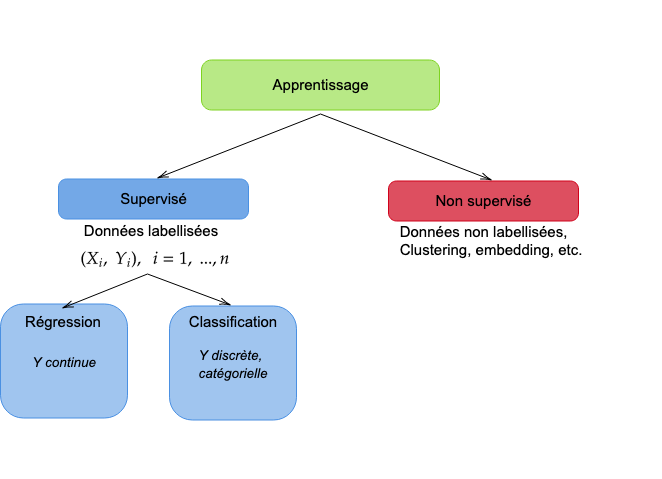



 
### 1.3 Entraînement d'un modèle en apprentissage supervisé

Les trois étapes suivantes sont les trois étapes principales de la méthodologie de base du data scientist : 

**1. Entraînement du modèle :** 

   On commence par diviser notre dataset (composé des $(X_i, Y_i)_{i=1, ..., n}$) en un dataset d'entraînement (qui contient par exemple 70% des lignes de la base), que l'on notera $(X_{\text{train}}, Y_{\text{train}})$, et un dataset de test, contenant le restant des lignes de la base, que l'on notera $(X_{\text{test}}, Y_{\text{test}})$.

   Diviser le dataset en *train* et *test* a un but précis : pouvoir tester sur $(X_{\text{test}}, Y_{\text{test}})$ les capacités de généralisation de notre modèle, qui aura été entraîné sur $(X_{\text{train}}, Y_{\text{train}})$ et n'aura jamais jamais vu $(X_{\text{test}}, Y_{\text{test}})$ au cours de son entraînement. 
   
   Pour un algorithme $f$, l'objectif  de la phase d'apprentissage est de trouver un ensemble de paramètres $\theta$
   tels que l'on prédise bien $Y$ à partir de $X$. On aimerait donc schématiquement que :
   $$Y \simeq f_{\alpha}(\theta, X) $$
   Ici, $\alpha$ symbolise les hyperparamètres du modèle. Les hyperparamètres sont des paramètres qui sont fixés pendant la phase d'entraînement classique, et qui définissent par exemple l'architecture du modèle : la profondeur des arbres, etc. On reviendra plus tard sur ces hyperparamètres, pour l'instant, on ne s'occupe que de $\theta$ : ce sont les seuls que l'on considère variables à ce stade.
   
   Notre objectif est donc le suivant : trouver $\hat{\theta}$ tel que $$\hat{\theta} \in \arg \underset{\theta}{\text{min}} \frac{1}{n_{\text{train}}} \sum_{i=1}^{n_{\text{train}}} l(y_i, f_{\alpha}(\theta, x_i))
$$   
   (En régression, on pourra par exemple prendre $l(y, y') = (y-y')^2$ (moindres carrés). On reverra les différentes fonctions de perte au TD2, car avec scikit-learn on a rarement besoin de s'en soucier : elles sont pré-implémentées et "cachées" dans le code.) 
   
   
   
   
   On peut alors passer à la phase suivante :
   
**2. Evaluation du modèle:**

Une fois notre $\hat{\theta}$ trouvé, on veut évaluer notre modèle sur notre échantillon de test $(X_{\text{test}}, Y_{\text{test}})$ avec une métrique $d : \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$ (qui peut être notre fonction de perte $l$, ou une autre fonction qui n'a pas servi à trouver $\hat{\theta}$). Les différentes métriques utiles selon les problèmes sont décrites un peu plus loin dans le notebook. En d'autres termes, on évalue: 
$$ d(Y_{\text{test}}, f_{\alpha}(\hat{\theta}, X_{\text{test}})$$
On peut évidemment remarquer que cette mesure de la performance peut totalement dépendre de la manière dont on a choisi la répartition des éléments dans nos échantillons de train et de test. On verra dans le prochain TD les méthodes de cross validation, qui permettent de contourner ces biais. 

Jusqu'ici, schématiquement, on a fait:
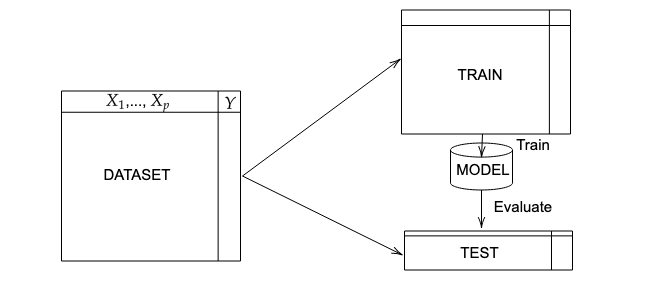

**3. Optimisation des hyperparamètres:**

Une fois notre modèle entraîné (notre $\hat{\theta}$ trouvé) et évalué, on s'intéresse à l'optimisation de $\alpha$. Cette partie là fera l'objet du TD 3 : c'est en effet la clé de voûte du travail du data scientist, qui doit en général trouver à la fois le meilleur algorithme et les meilleurs hyperparamètres pour un algorithme donné. 




Dans ce premier TD, on verra comment entraîner et évaluer des modèles de classification avec scikit-learn. On verra essentiellement la régression logistique et l'algorithme des plus proches voisins. Dans le prochain TD, on détaillera d'abord les fonctions de perte et les métriques intéressantes puis on s'attaquera à un problème de régression, avec des arbres de décision et des forêts aléatoires. En TD3, on abordera les thématiques du boosting et d'optimisation des hyperparamètres. Enfin, dans le dernier TD, on fera une introduction au deep learning, que l'on appliquera sur des données textuelles. 




## 2. Consignes

Ces consignes s'inspirent et suivent le sujet du TD1 : http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_enonce_cl_reg_anomaly.html#td2aenonceclreganomalyrst


1. Télécharger et ouvrir avec pandas le dataset disponible ici : https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/data/data_2a/wines-quality.csv

2. Faire un peu de visualisation, et montrer l'histogramme de répartition des notes des vins. 

3. Séparer le dataset en train et en test. Est-ce que la répartition des notes varie entre le train et le test? Par rapport au dataset d'origine? Comment faire une séparation équilibrée? 

4. Quelle est la nature de chacune des features? Que remarquez vous? Adapter le dataset en fonction.

5. Entraîner un premier classifieur avec scikit-learn : une régression logistique

6. Evaluer avec scikit-learn et avec les métriques adaptées à la classification les performances de la régression logistique. 


###  1. Télécharger et ouvrir avec pandas le dataset disponible ici : https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/data/data_2a/wines-quality.csv

- Si vous avez cloné ce repo github, vous avez déjà le fichier, vous pouvez vous contenter de faire:



In [2]:
import pandas as pd
df = pd.read_csv('./data/wines-quality.csv')

### 2. Faire un peu de visualisation, et montrer l'histogramme de répartition des notes des vins. 

On commence par voir toutes les colonnes qu'offre la base avec ```df.columns``` et ```df.head``` : 



In [3]:
print(df.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red



Pour sélectionner une colonne avec pandas, on peut utiliserles méthodes suivantes: ```df.nom_colonne ``` ou, plus correctement ```df['nom_colonne']```. Pour un ensemble de colonnes : ```df[['nom_colonne1', 'nom_colonne2']] ```. 

Pour avoir l'histogramme, on fait simplement ```df.nom_colonne.hist()```. On peut régler le nombre de rectangles de l'histogramme avec le paramètre ```bins```. 

(On ajoute ```%matplotlib inline``` pour avoir tous les graphes qui s'affichent correctement dans le notebook.) 

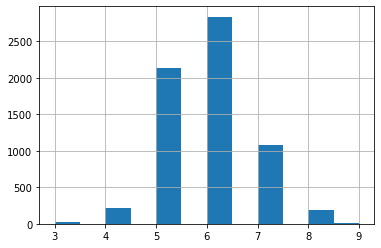

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.quality.hist(bins=12)

Les notes attribuées aux vins sont distribuées entre 0 et 10. 

### 3. Séparer le dataset en train et en test. Est-ce que la répartition des notes varie entre le train et le test? Par rapport au dataset d'origine? Comment faire une séparation équilibrée? 


On importe et on utilise la fonction de base de scikit-learn (https://scikit-learn.org/stable/index.html) pour séparer nos datasets entre train et test. 

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train.shape, X_test.shape

((3248, 12), (3249, 12))

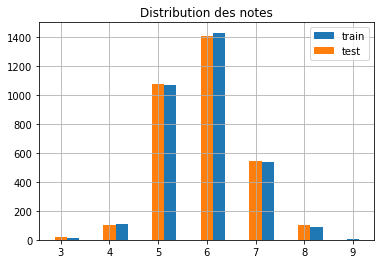

In [7]:
ax = y_train.hist(bins=24, label="train", align="right")
y_test.hist(bins=24, label="test", ax=ax, align="left")
ax.set_title("Distribution des notes")
ax.legend();

Les répartitions ne sont pas exactement similaires. On utilise le paramètre ```stratify``` : 






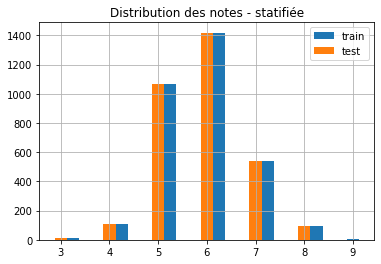

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5)
X_train.shape, X_test.shape
ax = y_train.hist(bins=24, label="train", align="right")
y_test.hist(bins=24, label="test", ax=ax, align="left")
ax.set_title("Distribution des notes - statifiée")
ax.legend();

Le train-test split assure maintenant d'avoir une représentation similaire des notes rare (ici, les notes rares sont es notes extrêmes) dans le train et le test. 

### 4. Quelle est la nature de chacune des features? Que remarquez vous? Adapter le dataset en fonction.


On utilise l'attribut ```dtypes``` dans pandas. 

In [10]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

On remarque que la couleur du vin est de type 'object' : ce n'est pas une variable numérique. 

Regardons les valeurs qu'elle prend :


In [13]:
df.color.unique()

array(['red', 'white'], dtype=object)

Il n'y a que deux couleurs dans la base, donc on va recoder la variable en 0/1 :

In [14]:
df['color'] = df.color.apply(lambda x: 0 if x=='red' else 0)

On peut refaire notre train-test split avec les valeurs de ```color``` actualisées, et avec un paramètre de split tel que le train représente 70% du dataset et le test 30% : 




In [16]:
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

### 5. Entraîner un premier classifieur avec scikit-learn : une régression logistique

Comme la variable à prédire, ```quality``` est catégorielle et non numérique, on est dans un problème de classification. 

On va utiliser un modèle très simple pour la classification: la régression logistique. C'est une variante de la régression linéaire, adaptée pour que l'output retourne une classe et non une valeur numérique. 

Présentons d'abord la régression logistique dans le cas où la variable à prédire ne peut prendre que deux classes (classification binaire), c'est à dire $$\mathcal{Y} = \{0,1\}$$

Pour une régression linéaire classique, on aimerait écrire :
$$y=a_1 x_1 + a_2 x_2 + ... + a_p x_p + \varepsilon$$
où $y$ est la variable à prédire, et les $x_j, j=1,...,p$ sont les features de la base de données. En phase d'apprentissage, on détermine les coefficients $a_1, ..., a_p$ qui sont les paramètres du modèle. En phase de prédiction, on connait nos coefficients, et l'on prédit $y$ par $\hat{y} = a_1 x_1 + a_2 x_2 + ... + a_p x_p$.


Cette relation linéaire est adaptée en régression, mais pas en classification. Pour l'adapter, on va plutôt modéliser :
$$y = \mathbb{I}\left(\sigma ( a_1 x_1 + a_2 x_2 + ... + a_p x_p)\geq \frac{1}{2}\right)$$


Avec $\sigma(t) = \frac{1}{1+e{-t}}$ la fonction sigmoïde, dont le graphe est le suivant : 
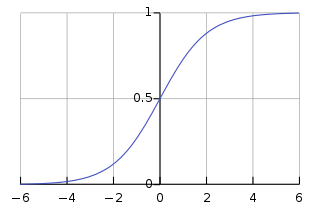

Dans le cas multinomial (classification avec plus de 2 classes de sortie, comme dans notre cas, on remplace la fonction logistique par la fonction softmax, qui va nous donner une probabilité, pour un $x$ d'entrée, d'appartenir à chacune des classes possibles. 

Entraînons la régression avec scikit-learn : 



In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/salome/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/salome/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Quel que soit le modèle que vous utiliserez, la trame sera souvent la même avec sklearn : 
- On importe un classifieur ou un régresseur (```from sklearn.linear_model import LogisticRegression```)
- On initialise un modèle, en précisant les hyperparamètres (ici on ne rafine pas dans un premier temps) : ```lr = LogisticRegression()```
- Sur nos données, on fitte le modèle : ```lr.fit(X_train, y_train)```

Les modèles sklearn sont donc des objets qui sont tous dotés de deux méthodes principales : ```modele.fit()```, et ```modele.predict()```. 


On peut tester la prédiction, par exemple sur les 5 premières lignes de l'échantillon de test :



In [18]:
lr.predict(X_test[:5])

array([6, 5, 6, 5, 6])

Maintenant qu'on a entraîné le modèle, on aimerait savoir s'il est bon ou pas : il faut l'évaluer. Scikit-learn propose une fonction simple et efficace dans le cas de la classification : ```classification_report```. On va regarder comment ça se présente, et expliquer les différentes métriques d'évaluation. 




In [19]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        65
           5       0.57      0.59      0.58       642
           6       0.51      0.74      0.60       851
           7       0.60      0.06      0.10       324
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1950
   macro avg       0.24      0.20      0.18      1950
weighted avg       0.51      0.53      0.47      1950



/home/salome/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Commençons par le plus simple : le support. C'est le nombre d'éléments dans chacune des classes de l'échantillon de test. Par exemple, il y a 9 éléments  notés avec une ```quality``` de 3 dans le ```y_test```.

Dans une classification à plusieurs classes, il est en effet important de prendre en compte l'éventuelle mauvaise répartition des labels dans chaque classe : sinon, certaines métriques peuvent être hautes de manière trompeuse. Si l'on a un dataset avec 80% de vins notés à $6$, et que l'on fait un modèle naïf qui prédit toujours la note $6$ pour tous les vins, on aura une accuracy de 80%, et pourtant le modèle sera mauvais.

Pour prendre en compte ces supports de tailles différentes, on décrit la précision et le recall pour une classe $k$ donnée:

- **precision** : il est définit par $p = \frac{TP}{TP+FP}$ où TP = "true positives" = nombre d'éléments de la classe $k$ qui ont effectivement bien été prédits dans la classe $k$, et FP = "false positives" = nombre d'éléments qui n'étaient pas de la classe $k$ mais qui ont à tort été prédits en classe $k$. 

La précision est donc le  rapport entre le nombre d'éléments correctement prédits comme classe $k$ et le nombre d'éléments total prédit comme $k$. Elle correspond à la pertinence de l'information remontée, mais ne s'intéresse pas à la quantité d'information remontée : on aura peut être raté certains exemples de la classe $k$, qui auront été prédit dans une autre classe, mais tout ce qui a été prédit en classe $k$ est effectivement de la classe $k$, et donc pertinent. 

- **recall** : il est définit par $r = \frac{TP}{TP+FN}$ où TP = "true positives" = nombre d'éléments de la classe $k$ qui ont effectivement bien été prédit dans la classe $k$, et FN = "false negatives" = nombre d'éléments qui étaient vraiment de la classe $k$ mais qui ont été prédit comme une autre classe.  

Le rappel est donc le rapport entre le nombre d'éléments correctement prédits comme classe $k$ et le nombre total d'éléments qui sont vraiment de la classe $k$ et qui auraient dû être prédits en $k$. Cela correspond à la quantité d'information effectivement remontée : même si l'on fait beaucoup d'erreur en prédisant en classe $k$ des exemples qui n'appartiennent pas à cette classe, on n'aura raté aucun exemple de la classe $k$.

- **f1-score** : le f1-score est la moyenne harmonique de la précision et du rappel, et il baisse si l'une des deux mesures baisse. On pourra retenir $f1 = 2 \frac{p \times r }{p+r}$

Toutes ces mesures valent pour une classe donnée $k$. Pour en faire une mesure globale, on peut moyenner les précisions / rappels pour chacune des classes (c'est le **macro average**), ou pondérer cette moyenne par la taille du support (**weighted avg**). 

Enfin, on a l'**accuracy**, qui est une mesure globale qui correspond au nombre moyen d'exemples correctement prédits. C'est la mesure la plus simple, mais la plus trompeuse (cf exemple des 80% d'accuracy plus haut). 



Dans notre modèle, les précision/rappel sont nuls pour les classes les moins représentées : on a donc un modèle qui a appris uniquement à prédire les classes les plus représentées, même s'il semble confondre les classes 5 et 6 entres elles (f1 score relativement bas). 

